<a href="https://colab.research.google.com/github/sizhky/AutoTrain/blob/master/nbs/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup Data and Libraries

In [1]:
%%capture
# Setup imports
try:
    import timm
except:
    !pip install -U torch-snippets typer imgaug timm fastai

In [2]:
# Setup Data
%load_ext autoreload
%autoreload 2

from torch_snippets import *
from fastai.vision.all import *

# If running locally from AutoTrain/nbs
if not os.path.exists('/content') and P().resolve().stem != 'AutoTrain':
    %cd ..

# If running from colab
if os.path.exists('/content') and not os.path.exists('/content/AutoTrain'):
    !git clone https://github.com/sizhky/AutoTrain

# change present working directory
if not P().resolve().stem == 'AutoTrain':
    %cd AutoTrain

# !git pull origin enhancement/fastai-classification
# !git checkout enhancement/fastai-classification

if not os.path.exists('imagenette2-160'):
    o = untar_data(URLs.IMAGENETTE_160)
    !cp -r {o} ./


2021-09-12 10:54:00.601 | WARNING  | torch_snippets:<module>:13 - sklearn is not found. Skipping relevant imports from submodule `sklegos`
Exception: No module named 'sklego'


/content/AutoTrain


## Verify Config

In [3]:
!cat config_classification.ini

cat: config_classification.ini: No such file or directory


2021-09-12 10:52:28.363 | INFO     | auto_train_classification.train:train_model:35 - Training from scratch!
2021-09-12 10:52:53.966 | INFO     | auto_train_classification.train:find_best_learning_rate:22 - LR Plot is saved at imagenette/find_lr_plot.png
2021-09-12 10:52:53.968 | INFO     | auto_train_classification.train:train_model:40 - Using lr: 0.0010000000474974513


(20, 0.0010000000474974513, {})
['Epoch, Train Loss, Validation Loss, Validation Accuracy, Time']


TypeError: ignored

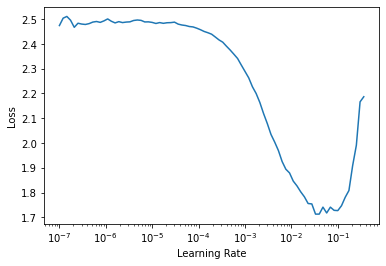

In [27]:
os.environ['CONFIG'] = 'configs/classification_imagenette.ini'
from auto_train_classification.train import train_model
train_model()

In [4]:
os.environ['CONFIG'] = 'configs/classification_imagenette.ini'
!python auto_train_classification/train.py

2021-09-12 10:54:08.444 | WARNING  | torch_snippets:<module>:13 - sklearn is not found. Skipping relevant imports from submodule `sklegos`
Exception: No module named 'sklego'
2021-09-12 10:54:12.406 | INFO     | __main__:train_model:35 - Training from scratch!
2021-09-12 10:54:44.110 | INFO     | __main__:find_best_learning_rate:22 - LR Plot is saved at imagenette/find_lr_plot.png
2021-09-12 10:54:44.111 | INFO     | __main__:train_model:40 - Using lr: 0.00013182566908653826
(2, 0.00013182566908653826, 2)
['Epoch, Train Loss, Validation Loss, Validation Accuracy, Time']
[0, 1.8888294696807861, 1.5228769779205322, 0.6402547955513, '00:51']
[1, 0.9272148609161377, 0.628566563129425, 0.8568152785301208, '00:50']
[0, 0.6768947243690491, 0.5767525434494019, 0.8654776811599731, '00:59']
[1, 0.6188012957572937, 0.5099591612815857, 0.8672611713409424, '00:59']
2021-09-12 10:58:24.313 | INFO     | __main__:train_model:55 - Saved weights of size ~18 MB to imagenette/models/trained-model-v1/mymod

---
## Validate

In [5]:
from auto_train_classification.infer import infer
infer('imagenette2-160/val/n01440764/')

2021-09-12 10:58:32.598 | INFO     | auto_train_classification.infer:<module>:6 - Loaded weights from imagenette/models/trained-model-v1/mymodel.pt to given model


[(» imagenette2-160/val/n01440764/n01440764_2290.JPEG,
  'n01440764',
  tensor(0.6419)),
 (» imagenette2-160/val/n01440764/n01440764_12111.JPEG,
  'n01440764',
  tensor(0.9974)),
 (» imagenette2-160/val/n01440764/n01440764_7571.JPEG,
  'n03394916',
  tensor(0.2307)),
 (» imagenette2-160/val/n01440764/n01440764_31170.JPEG,
  'n01440764',
  tensor(0.9769))]